<a href="https://colab.research.google.com/github/prj-07/MLMinis/blob/main/HeartAttackPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torchvision.datasets.utils import download_url
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
import os
from torchvision.datasets import ImageFolder
import PIL
from torchvision.transforms.functional import to_pil_image
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import Dataset
import tarfile
import seaborn as sns
!pip install jovian --upgrade --quiet
import jovian
import numpy as np
from torchvision.utils import make_grid
import pandas as pd
!pip install  opendatasets --quiet
import opendatasets as od 

     |████████████████████████████████| 68 kB 3.0 MB/s 


In [4]:
od.download('https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pratyushraj07
Your Kaggle Key: ··········


100%|██████████| 8.56k/8.56k [00:00<00:00, 2.24MB/s]

In [5]:
df  = pd.read_csv('heart-failure-prediction/heart.csv')

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
#df['ExerciseAngina']  =  df['ExerciseAngina'].map({"Y":1,"N":0})

In [8]:
x = df.drop("HeartDisease",axis =1)

In [9]:
y = df["HeartDisease"]

In [10]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [33]:
y_train = y_train.values

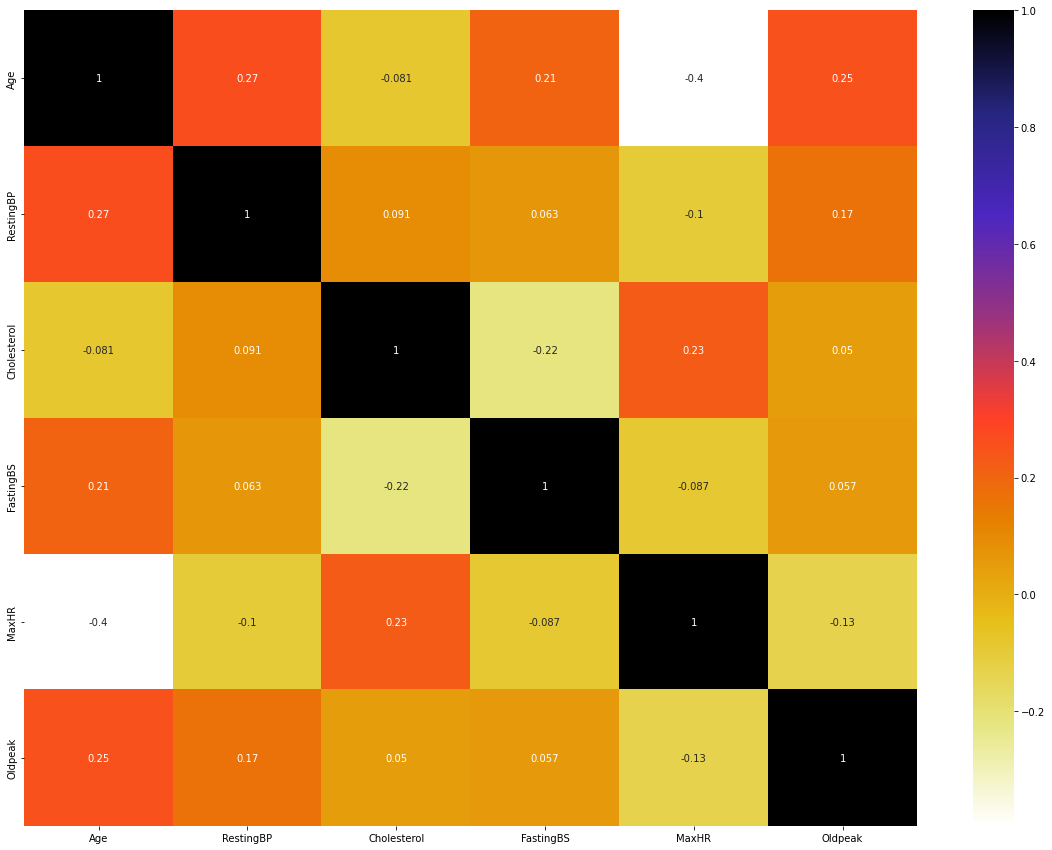

In [13]:
plt.figure(figsize=(20,15))
corr = x_train.corr()
sns.heatmap(corr,annot =True,cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
#hence exercise angina must be dropped

In [15]:
df = df.drop("ExerciseAngina",axis = 1)

In [16]:
##lets convert encode the other features using column transformere

In [38]:
x_train = x_train.drop("ExerciseAngina",axis = 1)
x_test = x_test.drop("ExerciseAngina",axis = 1)

In [39]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope
50,50,M,ASY,130,233,0,Normal,121,2.0,Flat
494,60,M,ASY,142,216,0,Normal,110,2.5,Flat
142,47,M,ASY,160,291,0,ST,158,3.0,Flat
363,56,M,ASY,120,0,0,ST,148,0.0,Flat
916,57,F,ATA,130,236,0,LVH,174,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...
143,53,M,ASY,140,243,0,Normal,155,0.0,Up
242,55,M,ATA,160,292,1,Normal,143,2.0,Flat
582,69,M,ASY,122,216,1,LVH,84,0.0,Flat
400,50,F,ASY,160,0,1,Normal,110,0.0,Flat


In [40]:
nom_cols  = [1,2,10]
ord_cols  = [6]

In [41]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder

oe = OrdinalEncoder(categories=[['Normal','LVH','ST']]
                    )
x_train_restecg = oe.fit_transform(x_train[['RestingECG']])
x_test_restecg = oe.fit_transform(x_test[['RestingECG']])

In [42]:
ohe = OneHotEncoder(drop='first',sparse = False)#Sex,ChestPainType,ST_Slo
x_train_s_c_st= ohe.fit_transform(x_train[['Sex','ChestPainType','ST_Slope']])
x_test_s_c_st= ohe.fit_transform(x_test[['Sex','ChestPainType','ST_Slope']])
x_train_s_c_st.shape  ##sex ke lie 2 cols ##st slpes ke lie 2 ocls and chest pain ke lie 2 cols

(642, 6)

In [43]:
##now to concatenate we remove the other cols 

In [44]:
x_rem_train = x_train.drop(columns=['Sex','ChestPainType','ST_Slope','RestingECG']).values ##to convert the remaining also to numpy arrays

In [45]:
x_rem_test = x_test.drop(columns=['Sex','ChestPainType','ST_Slope','RestingECG']).values ##to convert the remaining also to numpy arrays

In [46]:
x_trans_train = np.concatenate((x_train_restecg,x_train_s_c_st,x_rem_train),axis=1)

In [47]:
x_trans_test = np.concatenate((x_test_restecg,x_test_s_c_st,x_rem_test),axis=1)

In [48]:
##data is ready  

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logreg = LogisticRegression(random_state = 16)

In [51]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [52]:
x_trans_train

array([[  0. ,   1. ,   0. , ...,   0. , 121. ,   2. ],
       [  0. ,   1. ,   0. , ...,   0. , 110. ,   2.5],
       [  2. ,   1. ,   0. , ...,   0. , 158. ,   3. ],
       ...,
       [  1. ,   1. ,   0. , ...,   1. ,  84. ,   0. ],
       [  0. ,   0. ,   0. , ...,   1. , 110. ,   0. ],
       [  1. ,   0. ,   1. , ...,   0. , 172. ,   1.4]])

In [53]:
logreg.fit(x_trans_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [55]:
y_pred = logreg.predict(x_trans_test)

In [56]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [58]:
from sklearn import metrics


In [59]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

In [60]:
cnf_matrix

array([[112,  26],
       [ 12, 126]])

In [61]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,y_pred)
print(accuracy_score)

<function accuracy_score at 0x7fee1d11c4c0>
